In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import string
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [2]:
data_fake=pd.read_csv(r'C:\Users\smann\Downloads\datasets\Fake.csv')
data_true=pd.read_csv(r'C:\Users\smann\Downloads\datasets\True.csv')

In [3]:
data_fake.head()


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
data_true.tail()

,title,text,subject,date
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017"


In [5]:
data_fake["class"]=0
data_true['class']=1

In [6]:
data_fake_manual_testing = data_fake.tail(10)
for i in range(23480,23470,-1):
    data_fake.drop([i],axis = 0, inplace = True)

    
data_true_manual_testing = data_true.tail(10)
for i in range(21416,21406,-1):
    data_true.drop([i],axis = 0, inplace = True)

In [7]:
data_fake.shape, data_true.shape

((23471, 5), (21407, 5))

In [8]:
data_fake_manual_testing['class']=0
data_true_manual_testing['class']=1

C:\Users\smann\AppData\Local\Temp\ipykernel_15016\1676563180.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_fake_manual_testing['class']=0
C:\Users\smann\AppData\Local\Temp\ipykernel_15016\1676563180.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_true_manual_testing['class']=1


In [9]:
data_fake_manual_testing.head(10)

,title,text,subject,date,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [10]:
data_true_manual_testing.head(10)

,title,text,subject,date,class
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",1
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",1
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",1
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


In [11]:
data_merge=pd.concat([data_fake, data_true], axis = 0)
data_merge.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [12]:
data_merge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [13]:
dt=data_merge.drop(['title','subject','date'], axis = 1)

In [14]:
dt.isnull().sum() 

text     0
class    0
dtype: int64

In [15]:
dt = dt.sample(frac = 1)
dt.head()



,text,class
10372,The hate for the Trump family by the defeated ...,0
11070,WASHINGTON (Reuters) - A U.S. Senate committee...,1
16597,Could this guy be any more clueless? Is it tha...,0
391,"On Tuesday afternoon, Miami-Dade Police tweete...",0
1424,The story of a slain DNC staffer complicates a...,0


In [16]:
dt.reset_index(inplace = True)
dt.drop(['index'], axis = 1, inplace = True)
dt.columns


Index(['text', 'class'], dtype='object')

In [17]:
dt.head()

,text,class
0,The hate for the Trump family by the defeated ...,0
1,WASHINGTON (Reuters) - A U.S. Senate committee...,1
2,Could this guy be any more clueless? Is it tha...,0
3,"On Tuesday afternoon, Miami-Dade Police tweete...",0
4,The story of a slain DNC staffer complicates a...,0


In [18]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download("stopwords")
nltk.download("punkt")
stopwords=set(stopwords.words("english"))
for index,row in dt.iterrows():
    t_words=word_tokenize(row['text'])
    t_words=[word.lower() for word in t_words if word.isalpha() and word.lower not in stopwords]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\smann\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\smann\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [19]:
dt['text']

0        The hate for the Trump family by the defeated ...
1        WASHINGTON (Reuters) - A U.S. Senate committee...
2        Could this guy be any more clueless? Is it tha...
3        On Tuesday afternoon, Miami-Dade Police tweete...
4        The story of a slain DNC staffer complicates a...
                               ...                        
44873    WASHINGTON (Reuters) - The United States is aw...
44874    BOGOTA (Reuters) - Pope Francis arrived in Col...
44875    NEW YORK (Reuters) - Donald Trump’s attacks on...
44876    BELGRADE (Reuters) - When a court on the Dutch...
44877    Except when someone tries to rob them or break...
Name: text, Length: 44878, dtype: object

In [20]:
t_words


['except',
 'when',
 'someone',
 'tries',
 'to',
 'rob',
 'them',
 'or',
 'break',
 'into',
 'their',
 'home',
 'or',
 'restaurant',
 'then',
 'of',
 'course',
 'the',
 'sheriff',
 'deputies',
 'will',
 'be',
 'welcome',
 'are',
 'you',
 'feeling',
 'lucky',
 'wash',
 'the',
 'sheriff',
 'of',
 'a',
 'county',
 'about',
 'miles',
 'north',
 'of',
 'seattle',
 'says',
 'a',
 'restaurant',
 'owner',
 'has',
 'asked',
 'that',
 'law',
 'enforcement',
 'no',
 'longer',
 'dine',
 'county',
 'sheriff',
 'will',
 'reichardt',
 'said',
 'on',
 'facebook',
 'that',
 'after',
 'four',
 'deputies',
 'finished',
 'lunch',
 'at',
 'lucky',
 's',
 'teriyaki',
 'in',
 'thursday',
 'the',
 'owner',
 'asked',
 'them',
 'not',
 'to',
 'eat',
 'there',
 'says',
 'the',
 'deputies',
 'were',
 'told',
 'that',
 'customers',
 'didn',
 't',
 'like',
 'law',
 'enforcement',
 'there',
 'the',
 'sheriff',
 'says',
 'his',
 'chief',
 'deputy',
 'called',
 'the',
 'owner',
 'later',
 'thursday',
 'and',
 'says',


In [21]:
x = dt['text']
y = dt['class']

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25)

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

In [24]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(xv_train, y_train)


LogisticRegression()

In [25]:
pred_lr = LR.predict(xv_test)
LR.score(xv_test, y_test)

0.9870766488413547

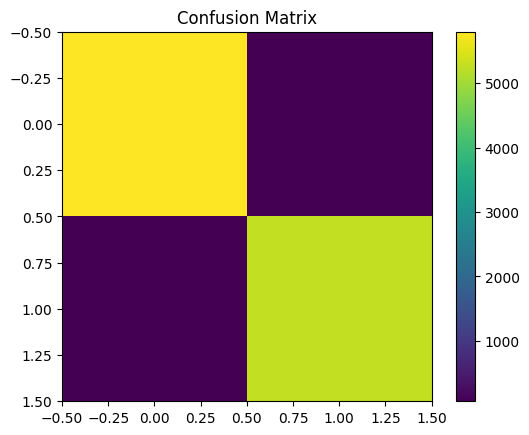

In [26]:
from sklearn.metrics import confusion_matrix
cm_LR= confusion_matrix(y_test,pred_lr)
plt.imshow(cm_LR, interpolation='nearest')
plt.title("Confusion Matrix")
plt.colorbar()
plt.show()

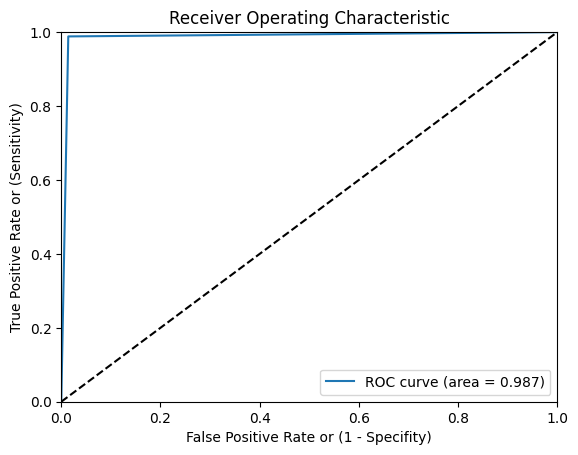

In [27]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

fpr, tpr, thresholds = roc_curve(y_test,pred_lr)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")


In [28]:
print (classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5884
           1       0.98      0.99      0.99      5336

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



In [29]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

DecisionTreeClassifier()

In [30]:
pred_dt = DT.predict(xv_test)
DT.score(xv_test, y_test)

0.9955436720142602

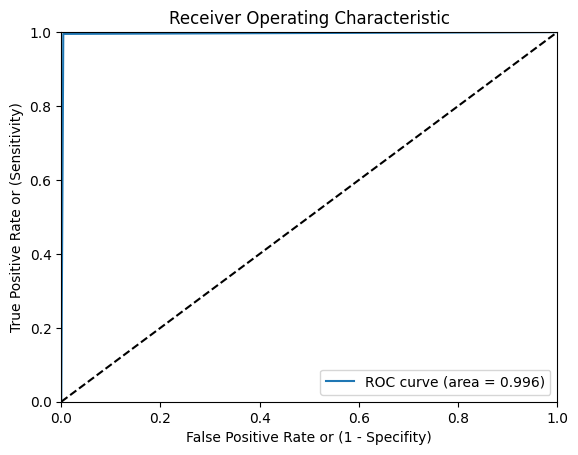

In [31]:
fpr, tpr, thresholds = roc_curve(y_test,pred_dt)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")


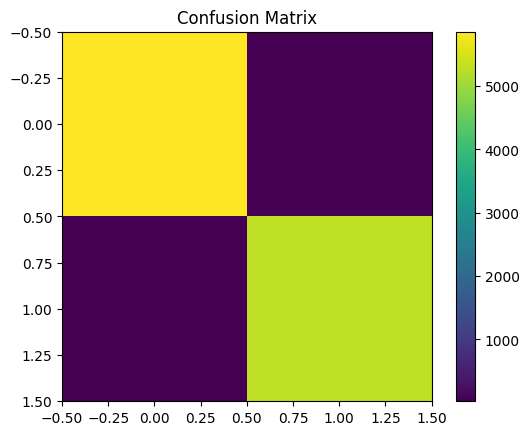

In [32]:
cm_DT= confusion_matrix(y_test, pred_dt)
plt.imshow(cm_DT, interpolation='nearest')
plt.title("Confusion Matrix")
plt.colorbar()
plt.show()

In [33]:
print (classification_report(y_test, pred_lr))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5884
           1       0.98      0.99      0.99      5336

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



In [34]:
GB = GradientBoostingClassifier(random_state = 0)
GB.fit(xv_train, y_train)

GradientBoostingClassifier(random_state=0)

In [35]:
pred_gb = GB.predict(xv_test)
GB.score(xv_test, y_test)

0.9948306595365419

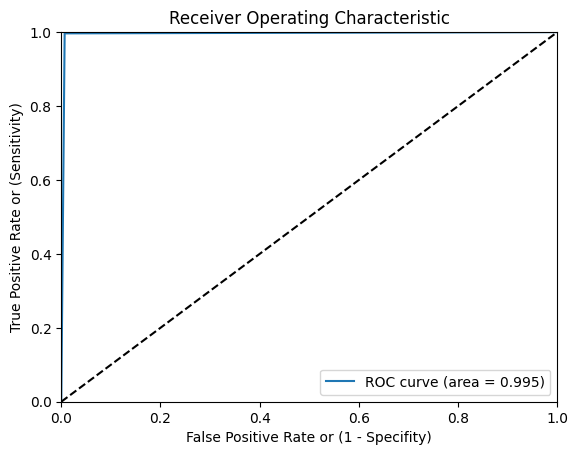

In [36]:
fpr, tpr, thresholds = roc_curve(y_test,pred_gb)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")


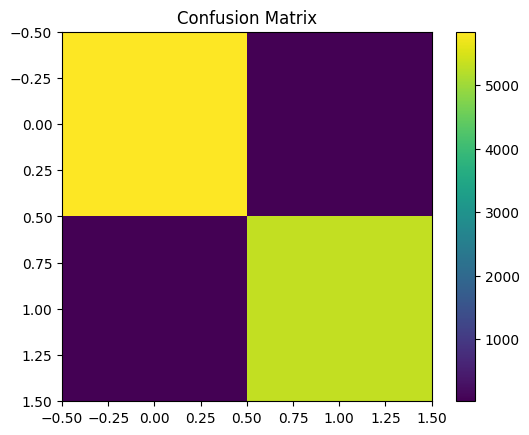

In [37]:
cm_GB= confusion_matrix(y_test, pred_gb)
plt.imshow(cm_GB, interpolation='nearest')
plt.title("Confusion Matrix")
plt.colorbar()
plt.show()

In [38]:
print(classification_report(y_test, pred_gb))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5884
           1       0.99      1.00      0.99      5336

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



In [39]:

RF = RandomForestClassifier(random_state = 0)
RF.fit(xv_train, y_train)


RandomForestClassifier(random_state=0)

In [40]:
pred_rf = RF.predict(xv_test)
RF.score(xv_test, y_test)

0.9894830659536542

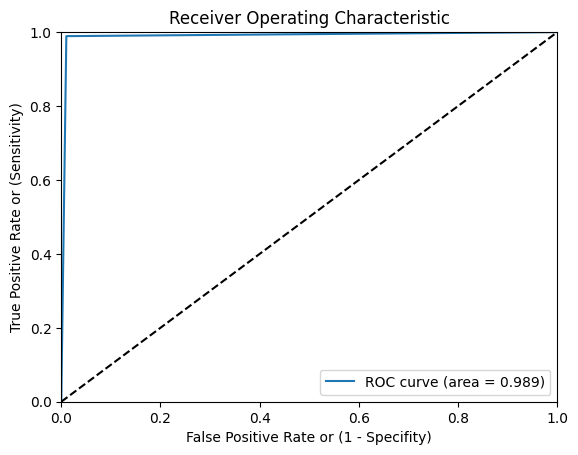

In [41]:
fpr, tpr, thresholds = roc_curve(y_test,pred_rf)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")


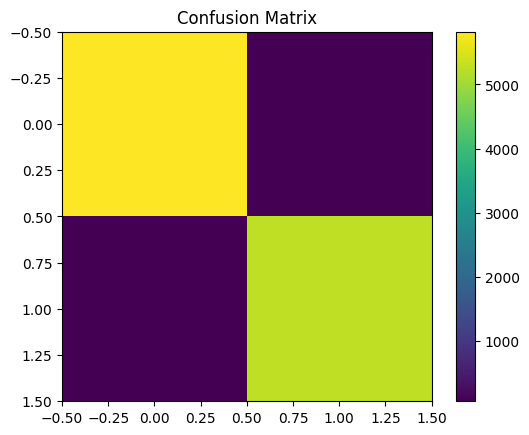

In [42]:
cm_RF= confusion_matrix(y_test, pred_rf)
plt.imshow(cm_RF, interpolation='nearest')
plt.title("Confusion Matrix")
plt.colorbar()
plt.show()

In [43]:
print (classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5884
           1       0.99      0.99      0.99      5336

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



In [46]:
def output_label(n):
    return "Fake" if n == 0 else "Real"

def manual_testing(news):
    testing_news = {"text": [news]}
    new_def_test = pd.DataFrame(testing_news)
   
    new_xv_test = vectorization.transform(new_def_test['text'])
    
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_GB = GB.predict(new_xv_test)
    pred_RF = RF.predict(new_xv_test)
    
    print("\n\nLR Prediction: {} \nDT Prediction: {} \nGBC Prediction: {} \nRFC Prediction: {}".format(
        output_label(pred_LR[0]),
        output_label(pred_DT[0]),
        output_label(pred_GB[0]),
        output_label(pred_RF[0])
    ))

news = str(input("Enter news text: ")) 
manual_testing(news)



LR Prediction: Fake 
DT Prediction: Fake 
GBC Prediction: Fake 
RFC Prediction: Fake
